In [193]:
# -- encoding: utf-8 --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

%matplotlib inline

# set Korean to display on matplotlib
fm.get_fontconfig_fonts(fontext='ttf')

[]

In [123]:
# import raw datafile for 19th presidential election
filename = "C:\\Users\\Neil\\Downloads\\@@20170510-19대선-투표구별개표자료(공개용).xlsx"
filecon = pd.ExcelFile(filename)

#check how many tabs
filecon.sheet_names
pres19 = pd.read_excel(filename, '19대선')

In [87]:
pres19.head(5)

,시도명,구시군명,읍면동명,투표구명,선거인수,투표수,후보자별 득표수,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,무효투표수,기권수
0,NaN,NaN,NaN,NaN,NaN,NaN,더불어민주당\n문재인,자유한국당\n홍준표,국민의당\n안철수,바른정당\n유승민,...,경제애국당\n오영국,국민대통합당\n장성민,늘푸른한국당\n이재오,민중연합당\n김선동,한국국민당\n이경희,홍익당\n윤홍식,무소속\n김민찬,계,NaN,NaN
1,전국,NaN,NaN,NaN,42479710.0,32807908.0,13423800,7852849,6998342,2208771,...,6040,21709,9140,27229,11355,18543,33990,32672175,135733.0,9671802.0
2,서울특별시,합계,NaN,NaN,8382999.0,6590646.0,2781345,1365285,1492767,476973,...,789,3554,1938,3416,1277,2177,3950,6568917,21729.0,1792353.0
3,서울특별시,종로구,합계,NaN,133769.0,102566.0,42512,22325,22313,7412,...,5,78,31,63,26,47,49,102202,364.0,31203.0
4,서울특별시,종로구,거소·선상투표,NaN,218.0,206.0,64,42,65,8,...,1,3,1,0,0,0,2,201,5.0,12.0


In [94]:
# check for factor values each variables take and count of null values
for var in pres19.columns.values:
    if 'Unnamed' not in var:
        factor = pres19[var].unique()
        nanct = pd.isnull(factor).sum()
        print('{}({},nan: {}): {}\n'.format(var, len(factor), nanct, factor))

# print all rows with any columns taking null value       
factor_vars = [var for var in pres19.columns.values if 'Unnamed' not in var and var != ]
pres19[pres19[factor_vars].isnull().any(1)]

시도명(19,nan: 1): [nan '전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시'
 '경기도' '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']

구시군명(229,nan: 1): [nan '합계' '종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구'
 '은평구' '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구'
 '송파구' '강동구' '서구' '동구' '영도구' '부산진구' '동래구' '남구' '북구' '해운대구' '기장군' '사하구'
 '금정구' '연제구' '수영구' '사상구' '수성구' '달서구' '달성군' '연수구' '남동구' '부평구' '계양구' '강화군'
 '옹진군' '광산구' '유성구' '대덕구' '울주군' '세종특별자치시' '수원시장안구' '수원시권선구' '수원시팔달구'
 '수원시영통구' '성남시수정구' '성남시중원구' '성남시분당구' '의정부시' '안양시만안구' '안양시동안구' '부천시' '광명시'
 '평택시' '양주시' '동두천시' '안산시상록구' '안산시단원구' '고양시덕양구' '고양시일산동구' '고양시일산서구' '과천시'
 '의왕시' '구리시' '남양주시' '오산시' '화성시' '시흥시' '군포시' '하남시' '파주시' '여주시' '이천시'
 '용인시처인구' '용인시수지구' '용인시기흥구' '안성시' '김포시' '광주시' '포천시' '연천군' '양평군' '가평군' '춘천시'
 '원주시' '강릉시' '동해시' '삼척시' '태백시' '정선군' '속초시' '고성군' '양양군' '인제군' '홍천군' '횡성군'
 '영월군' '평창군' '화천군' '양구군' '철원군' '청주시상당구' '청주시서원구' '청주시흥덕구' '청주시청원구' '충주시'
 '제천시' '단양군' '영동군' '보은군

,시도명,구시군명,읍면동명,투표구명,선거인수,투표수,후보자별 득표수,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,무효투표수,기권수
0,NaN,NaN,NaN,NaN,NaN,NaN,더불어민주당\n문재인,자유한국당\n홍준표,국민의당\n안철수,바른정당\n유승민,...,경제애국당\n오영국,국민대통합당\n장성민,늘푸른한국당\n이재오,민중연합당\n김선동,한국국민당\n이경희,홍익당\n윤홍식,무소속\n김민찬,계,NaN,NaN
1,전국,NaN,NaN,NaN,42479710.0,32807908.0,13423800,7852849,6998342,2208771,...,6040,21709,9140,27229,11355,18543,33990,32672175,135733.0,9671802.0
2,서울특별시,합계,NaN,NaN,8382999.0,6590646.0,2781345,1365285,1492767,476973,...,789,3554,1938,3416,1277,2177,3950,6568917,21729.0,1792353.0
3,서울특별시,종로구,합계,NaN,133769.0,102566.0,42512,22325,22313,7412,...,5,78,31,63,26,47,49,102202,364.0,31203.0
4,서울특별시,종로구,거소·선상투표,NaN,218.0,206.0,64,42,65,8,...,1,3,1,0,0,0,2,201,5.0,12.0
5,서울특별시,종로구,관외사전투표,NaN,12803.0,12803.0,5842,2025,2509,1156,...,0,4,2,15,6,9,6,12736,67.0,0.0
6,서울특별시,종로구,재외투표,NaN,2490.0,1813.0,987,215,304,75,...,0,1,0,1,0,0,0,1805,8.0,677.0
84,서울특별시,종로구,잘못 투입·구분된 투표지,NaN,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
85,서울특별시,중구,합계,NaN,109836.0,82852.0,34062,17901,19372,5874,...,12,53,21,55,18,25,51,82595,257.0,26984.0
86,서울특별시,중구,거소·선상투표,NaN,174.0,157.0,60,34,48,8,...,0,0,0,0,0,0,1,154,3.0,17.0


In [133]:
# define new variable column and identify key vars to melt further down
newvars = np.where(['Unnamed' in var or var == '후보자별 득표수' for var in pres19.columns.values], pres19.iloc[0], pres19.columns.values)
keyvars = [var1 for var1, var2 in zip(pres19.columns.values, pres19.iloc[0]) if 'Unnamed' not in var1 and var1 != '후보자별 득표수']

pres19.columns = newvars
pres19 = pres19.iloc[1:,:]

In [166]:
# melt data to long form
long = pres19.melt(keyvars, var_name = '후보자', value_name = '득표수')

# check if melting is correctly done
(long.loc[((long.시도명 == '전국') & (long.후보자 != '계')), '득표수'].sum() 
 == long.loc[(long.후보자 == '계') & (long.시도명 == '전국'), '득표수'])

288782    True
Name: 득표수, dtype: bool

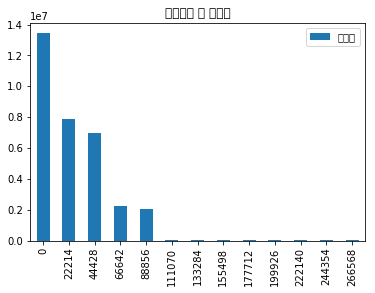

In [191]:
long.loc[((long.시도명 == '전국') & (long.후보자 != '계')), ['후보자', '득표수']].plot(kind = 'bar')
plt.title('후보자별 총 득표수')
plt.show()

array(['더불어민주당\n문재인', '자유한국당\n홍준표', '국민의당\n안철수', '바른정당\n유승민', '정의당\n심상정',
       '새누리당\n조원진', '경제애국당\n오영국', '국민대통합당\n장성민', '늘푸른한국당\n이재오',
       '민중연합당\n김선동', '한국국민당\n이경희', '홍익당\n윤홍식', '무소속\n김민찬', '계'], dtype=object)